<a href="https://colab.research.google.com/github/yasnitanoto/exercise/blob/main/FGA_TFLite_Yasnita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identitas**
#### Nama: Yasnita
#### total data: 4317

## **Import Packages dan Data**

In [ ]:
import tensorflow as tf
import os
import zipfile

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"orionst","key":"1d6046527e84f52958814830ef5e74b8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

!kaggle datasets download -d alxmamaev/flowers-recognition

kaggle.json
 93% 210M/225M [00:05<00:00, 40.9MB/s]
100% 225M/225M [00:05<00:00, 40.9MB/s]


In [ ]:
!mkdir flowers-dataset
!unzip flowers-recognition.zip -d flowers-dataset
# !ls flowers-dataset

Archive:  flowers-recognition.zip
  inflating: flowers-dataset/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers-dataset/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers-dataset/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers-dataset/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers-dataset/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers-dataset/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers-dataset/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers-dataset/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers-dataset/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers-dataset/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers-dataset/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers-dataset/flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers-dataset/flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers-

In [ ]:
os.listdir('flowers-dataset/flowers')

['sunflower', 'rose', 'tulip', 'dandelion', 'daisy']

In [ ]:
base_dir = 'flowers-dataset/flowers'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

if not os.path.exists(train_dir): os.mkdir(train_dir)
if not os.path.exists(val_dir): os.mkdir(val_dir)

In [ ]:
os.listdir('flowers-dataset/flowers')

['sunflower', 'train', 'val', 'rose', 'tulip', 'dandelion', 'daisy']

In [ ]:
daisy_dir = os.path.join(base_dir, 'daisy')
dandelion_dir = os.path.join(base_dir, 'dandelion')
rose_dir = os.path.join(base_dir, 'rose')
sunflower_dir = os.path.join(base_dir, 'sunflower')
tulip_dir = os.path.join(base_dir, 'tulip')

In [ ]:
dai = len(os.listdir(daisy_dir))
dan = len(os.listdir(dandelion_dir))
ros = len(os.listdir(rose_dir))
sun = len(os.listdir(sunflower_dir))
tul = len(os.listdir(tulip_dir))

print('daisy:', dai)
print('dande:', dan)
print('rose:', ros)
print('sunfl:', sun)
print('tulip:', tul)
print('total:', dai+dan+ros+sun+tul)

daisy: 764
dande: 1052
rose: 784
sunfl: 733
tulip: 984
total: 4317


In [ ]:
# Membuat directory train untuk paper, rock, scissor
train_daisy = os.path.join(train_dir, 'daisy')
train_dandelion = os.path.join(train_dir, 'dandelion')
train_rose = os.path.join(train_dir, 'rose')
train_sunflower = os.path.join(train_dir, 'sunflower')
train_tulip = os.path.join(train_dir, 'tulip')

if not os.path.exists(train_daisy): os.mkdir(train_daisy)
if not os.path.exists(train_dandelion): os.mkdir(train_dandelion)
if not os.path.exists(train_rose): os.mkdir(train_rose)
if not os.path.exists(train_sunflower): os.mkdir(train_sunflower)
if not os.path.exists(train_tulip): os.mkdir(train_tulip)

In [ ]:
# Membuat directory validation untuk paper, rock, scissor
val_daisy = os.path.join(val_dir, 'daisy')
val_dandelion = os.path.join(val_dir, 'dandelion')
val_rose = os.path.join(val_dir, 'rose')
val_sunflower = os.path.join(val_dir, 'sunflower')
val_tulip = os.path.join(val_dir, 'tulip')

if not os.path.exists(val_daisy): os.mkdir(val_daisy)
if not os.path.exists(val_dandelion): os.mkdir(val_dandelion)
if not os.path.exists(val_rose): os.mkdir(val_rose)
if not os.path.exists(val_sunflower): os.mkdir(val_sunflower)
if not os.path.exists(val_tulip): os.mkdir(val_tulip)

## **Split Data ke Train dan Validation**

In [ ]:
# Split data menggunakan library sklearn
from sklearn.model_selection import train_test_split as tts
train_daisy_dir, val_daisy_dir = tts(os.listdir(daisy_dir), test_size=0.20)
train_dandelion_dir, val_dandelion_dir = tts(os.listdir(dandelion_dir), test_size=0.20)
train_rose_dir, val_rose_dir = tts(os.listdir(rose_dir), test_size=0.20)
train_sunflower_dir, val_sunflower_dir = tts(os.listdir(sunflower_dir), test_size=0.20)
train_tulip_dir, val_tulip_dir = tts(os.listdir(tulip_dir), test_size=0.20)

In [ ]:
# Menyalin gambar ke directory baru (disalin ke train dan val)
import shutil

for i in train_daisy_dir:
    shutil.copy(os.path.join(daisy_dir, i), 
                os.path.join(train_daisy, i))
for i in train_dandelion_dir:
    shutil.copy(os.path.join(dandelion_dir, i), 
                os.path.join(train_dandelion, i))
for i in train_rose_dir:
    shutil.copy(os.path.join(rose_dir, i), 
                os.path.join(train_rose, i))
for i in train_sunflower_dir:
    shutil.copy(os.path.join(sunflower_dir, i), 
                os.path.join(train_sunflower, i))
for i in train_tulip_dir:
    shutil.copy(os.path.join(tulip_dir, i), 
                os.path.join(train_tulip, i))


In [ ]:
for i in val_daisy_dir:
    shutil.copy(os.path.join(daisy_dir, i), 
                os.path.join(val_daisy, i))
for i in val_dandelion_dir:
    shutil.copy(os.path.join(dandelion_dir, i), 
                os.path.join(val_dandelion, i))
for i in val_rose_dir:
    shutil.copy(os.path.join(rose_dir, i), 
                os.path.join(val_rose, i))
for i in val_sunflower_dir:
    shutil.copy(os.path.join(sunflower_dir, i), 
                os.path.join(val_sunflower, i))
for i in val_tulip_dir:
    shutil.copy(os.path.join(tulip_dir, i), 
                os.path.join(val_tulip, i))

In [ ]:
# Augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    zoom_range=0.2,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    # validation_split=0.2
                    )
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    zoom_range=0.2,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
batch_size= 128
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=batch_size,
        class_mode='categorical'
        ) 
 
validation_generator = train_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150), 
        batch_size=batch_size, 
        class_mode='categorical'
        )

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [ ]:
# Membuat model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, (3,3), strides=(1,1), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    # Conv2D(64, (3,3), activation='relu'),
    # MaxPooling2D(3,3),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         1

In [ ]:
# Konfigurasi model
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['acc'])

In [ ]:
acc_threshold = 0.80
class stopepoch(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc' and 'val_acc') > acc_threshold):   
          print("\nReached > 80% of accuracy")   
          self.model.stop_training = True

#Instantiate callback
callbacks = stopepoch()

In [ ]:
# Fit model
with tf.device("/device:GPU:0"):
  history = model.fit(
      train_generator,
      # steps_per_epoch = 10,
      steps_per_epoch = train_generator.samples // batch_size,
      epochs=40,
      validation_data = validation_generator,
      validation_steps = validation_generator.samples // batch_size,
      verbose = 1,
      callbacks=[callbacks]
)

Epoch 1/20
26/26 [==============================] - 229s 9s/step - loss: 1.4088 - acc: 0.3505 - val_loss: 1.1881 - val_acc: 0.4792
Epoch 2/20
26/26 [==============================] - 227s 9s/step - loss: 1.1596 - acc: 0.5051 - val_loss: 1.0514 - val_acc: 0.5508
Epoch 3/20
26/26 [==============================] - 229s 9s/step - loss: 1.0760 - acc: 0.5569 - val_loss: 1.0319 - val_acc: 0.5573
Epoch 4/20
26/26 [==============================] - 226s 9s/step - loss: 1.0064 - acc: 0.5966 - val_loss: 0.9536 - val_acc: 0.5911
Epoch 5/20
26/26 [==============================] - 225s 9s/step - loss: 0.9883 - acc: 0.5969 - val_loss: 0.9660 - val_acc: 0.6133
Epoch 6/20
26/26 [==============================] - 231s 9s/step - loss: 0.9322 - acc: 0.6242 - val_loss: 0.9103 - val_acc: 0.6224
Epoch 7/20
26/26 [==============================] - 225s 9s/step - loss: 0.8890 - acc: 0.6540 - val_loss: 0.8432 - val_acc: 0.6680
Epoch 8/20
26/26 [==============================] - 229s 9s/step - loss: 0.8235 - a

In [ ]:
# Membuat fungsi Plot untuk visualisasi akurasi dan loss
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and Validation '+ metric)
    plt.xlabel("epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

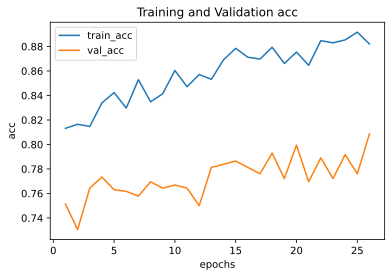

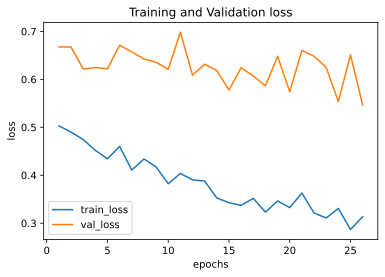

In [ ]:
# Memanggil fungsi plot
plot_metric(history, 'acc')
plot_metric(history, 'loss')

## **Upload dan Prediksi Image**

Saving 11746276_de3dec8201.jpg to 11746276_de3dec8201.jpg
11746276_de3dec8201.jpg
Tulip!


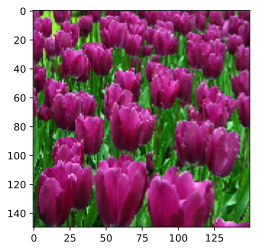

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
    path=fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x= image.img_to_array(img)
    x= np.expand_dims(x, axis=0)
    
    images= np.vstack([x])
    classes=model.predict(images, batch_size=10)
    
    print(fn)
    if classes[0,0]!=0:
        print("It's Daisy!")
    elif classes[0,1]!=0:
        print('Dandelion!')
    elif classes[0,2]!=0:
        print('Rose!')
    elif classes[0,3]!=0:
        print('Sunflower!')
    else:
        print('Tulip!')

## **Export Tflite**

In [ ]:
# warnings.filterwarnings('ignore')
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

#savemodel
with open('flowersmodel.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp6decohiv/assets
